# Plotting Synop observations with Python

Here we'll learn about how to use openweatherviz to automatically read synoptic observations from the Internet, decode it with string manipulation and then plot it with MetPy, Cartopy and plotly.

First we need to import all the necessary functions from the different files. Openweatherviz uses three different files for different purposes:
* synop_download - A subroutine to create the url for data download and the path where the file will be written to on the local hard drive
* synop_read_data - A subroutine to decode all the downloaded synoptic weather reports
* SYNOP_no_bg - An example subroutine to visualise the retrieved synop data

In [1]:
from synop_read_data import synop_df
from synop_download import url_last_hour, url_any_hour, download_and_save
from SYNOP_no_bg import reduce_density, plot_map_standard

# Plotting a map for the current time

The routine url_last_hour() with return an url and a path from where to download and where to save to the SYNOP observations at the last full hour. If the current time is 15:33 UTC, then it will try to retrieve all the observations taken between 14:31 and 15:29 (uncomfired if it really only uses obs. until 15:29 or until the next full hour?!).

In [12]:
%%capture 
url, path = url_last_hour()  # get url and path
download_and_save(path, url)  # download the data
df_synop, df_climat = synop_df(path)  # decode the data and save it as pandas dataframe

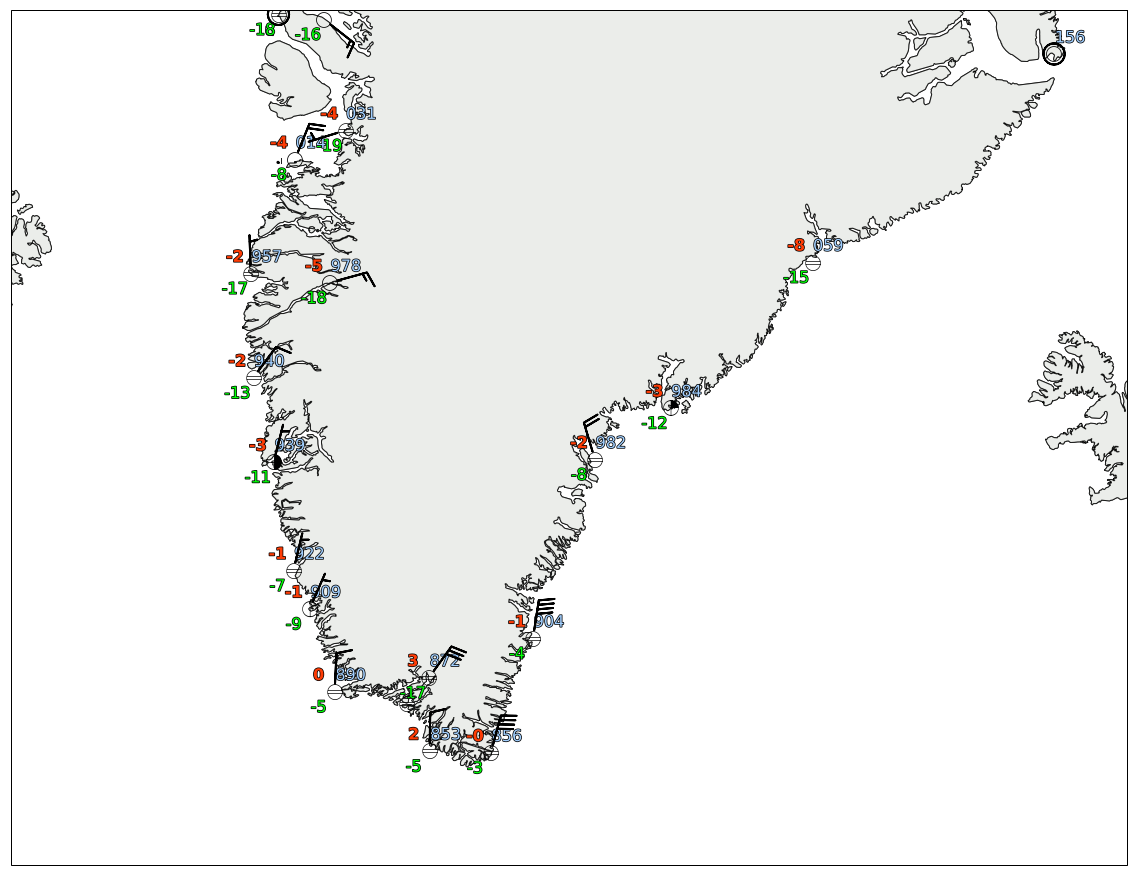

In [11]:
%%capture --no-stdout --no-display
proj, point_locs, df_synop_red = reduce_density(df_synop, 60000, 'GR')
plot_map_standard(proj, point_locs, df_synop_red, area='GR_S', west=-58, east=-23,
                  south=58, north=70.5,  fonts=16)

# Plotting a map for any given time

The routine `url_any_hour(year, month, day, hour)` will return an url and a path from where to download and where to save to the SYNOP observations at the date provided.

First we will specify a specific date (2017-01-22 at 15 UTC) on which we'll download all the data. After that, we will pass the path of the saved file to `synop_df(path)` to decode all the observations and make it accessible to plot them via MetPy.

In [2]:
%%capture
url, path = url_any_hour(2017,1,22,15)
download_and_save(path, url)
df_synop, df_climat = synop_df(path)

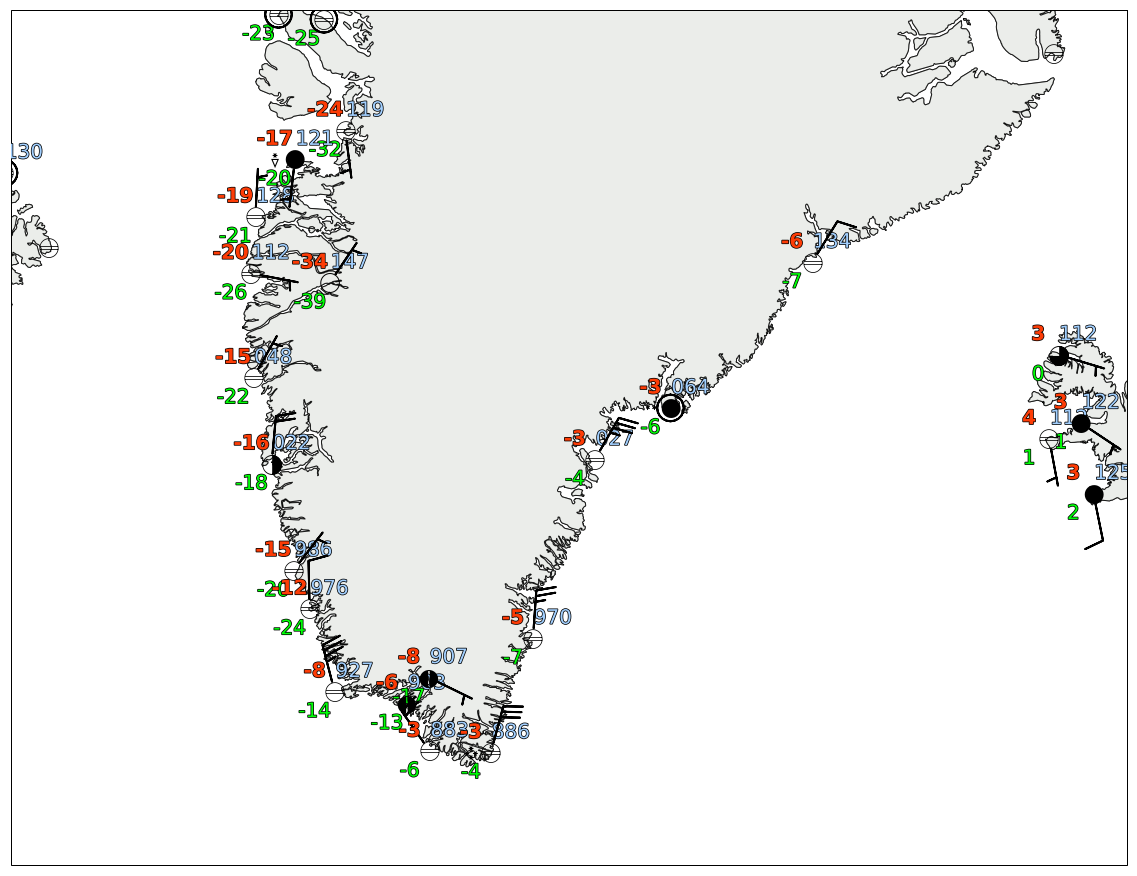

In [3]:
%%capture --no-stdout --no-display
proj, point_locs, df_synop_red = reduce_density(df_synop, 60000, 'GR')
plot_map_standard(proj, point_locs, df_synop_red, area='GR_S', west=-58, east=-23,
                  south=58, north=70.5,  fonts=20)

# Plotting observations for different areas

But it isn't just possible to plot data for the south of Greenland. As seen in the `plot_map_standard(....)` arguments that were given, we can easily change the covered area by changing the parameters `east= , west= , north= , south= ,` which are the bounding latitudes and longitudes. If we want to plot for example the latest observations for the United Kingdom we can simply run the following code.

http://www.ogimet.com/cgi-bin/getsynop?begin=201801221731
http://www.ogimet.com/cgi-bin/getsynop?begin=201801221731&end=201801221829
http://www.ogimet.com/cgi-bin/getsynop?begin=201801221731&end=201801221829&lang=eng
http://www.ogimet.com/cgi-bin/getsynop?begin=201801221731&end=201801221829&lang=eng&header=yes
Saved file to /home/sh16450/Documents/Synop_data/synop_201801221800.csv.


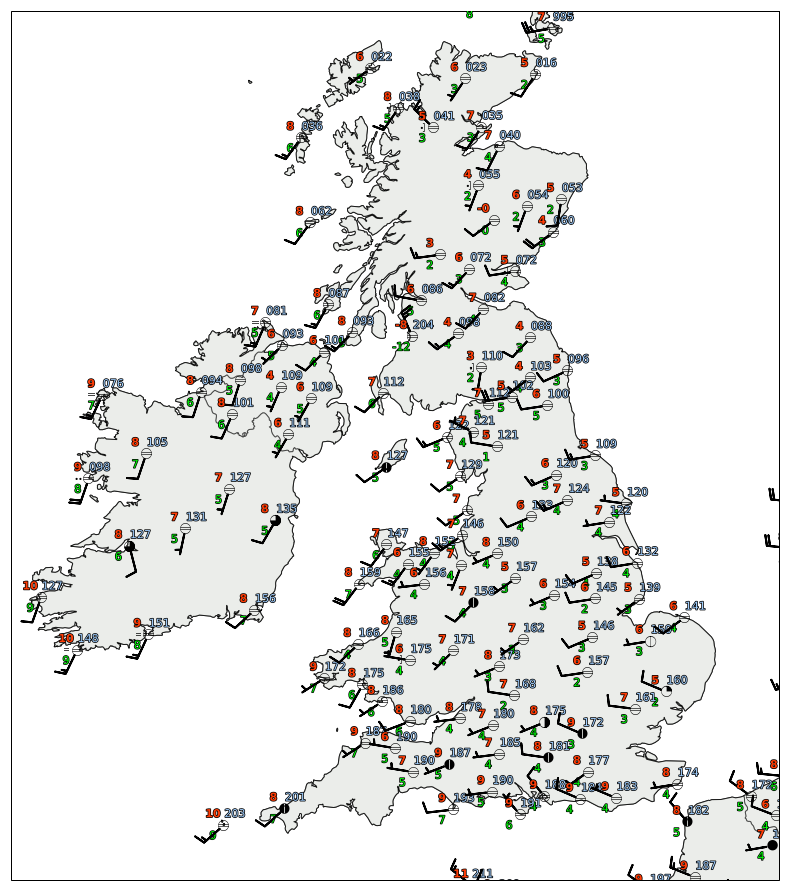

In [3]:
%%capture --no-stdout --no-display
# download, save and decode the observations
url, path = url_last_hour()
download_and_save(path, url)
df_synop, df_climat = synop_df(path)

# reduce the density and plot the synop observations on the UK map
proj, point_locs, df_synop_red = reduce_density(df_synop, 30000)
plot_map_standard(proj, point_locs, df_synop_red, area='UK', west=-10.1, east=1.8,
                      south=50.1, north=58.4,  fonts=11)